In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/yogeshsaini/ml Projects/WatchPrice/data/smartwatches.csv')

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

1. Unnamed: 0 (remove)

In [5]:
df.shape

(450, 16)

In [6]:
train_df = df.sample(frac=0.8, random_state=42)

In [7]:
test_df = df.drop(train_df.index)

In [8]:
train_df = train_df.reset_index()

In [9]:
test_df = test_df.reset_index()

In [10]:
print(train_df.shape, test_df.shape)

(360, 17) (90, 17)


In [11]:
train_df.tail()

index  Unnamed: 0      Brand  Current Price  Original Price  \
355    216         216     fitbit        11699.0         14999.0   
356    279         279     garmin        39490.0         44990.0   
357    390         390  zebronics         2199.0          4999.0   
358    337         337    gizmore         1199.0          4499.0   
359    236         236     fitbit        20499.0             NaN   

     Discount Percentage  Rating  Number OF Ratings  \
355            22.001467     4.3             3999.0   
356            12.224939     4.7              109.0   
357            56.011202     3.9              272.0   
358            73.349633     4.7                NaN   
359                  NaN     4.7                NaN   

                                            Model Name Dial Shape Strap Color  \
355                                            Versa 2     Square       Black   
356  Instinct 2, Rugged Outdoor Watch with GPS, Bui...     Circle        Grey   
357                                         Zeb-Fit Me     Square       Green   
358  GizFit CLOUD 1.85 IPS Large Display | AI Voice...     Square        Blue   
359  Fitbit Versa 4 Fitness Watch (Waterfall Blue /...     Curved        Blue   

                  Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
355                      Silicon         Yes                  3.5       Yes   
356                      Silicon          No                 17.5       Yes   
357  Thermo Plastic Polyurethene         Yes                 22.0       Yes   
358                      Silicon         Yes                 22.0       Yes   
359                       Rubber         Yes                 22.0       Yes   

    Display Size     Weight  
355   1.3 inches  20 - 35 g  
356   0.9 inches        NaN  
357   3.3 inches  20 - 35 g  
358   1.8 inches  20 - 35 g  
359   0.2 inches        NaN

In [12]:
train_df.dtypes

index                    int64
Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [13]:
train_df.isna().sum()

index                    0
Unnamed: 0               0
Brand                    0
Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)     30
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

1. null value

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Unnamed: 0           360 non-null    int64  
 2   Brand                360 non-null    object 
 3   Current Price        354 non-null    float64
 4   Original Price       304 non-null    float64
 5   Discount Percentage  304 non-null    float64
 6   Rating               356 non-null    float64
 7   Number OF Ratings    315 non-null    float64
 8   Model Name           330 non-null    object 
 9   Dial Shape           260 non-null    object 
 10  Strap Color          260 non-null    object 
 11  Strap Material       304 non-null    object 
 12  Touchscreen          329 non-null    object 
 13  Battery Life (Days)  330 non-null    float64
 14  Bluetooth            355 non-null    object 
 15  Display Size         333 non-null    obj

In [15]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']

In [16]:
continous_data = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [17]:
numerical_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [18]:
continous_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [19]:
train_df[numerical_data].describe()

index  Unnamed: 0  Current Price  Original Price  \
count  360.000000  360.000000     354.000000      304.000000   
mean   222.702778  222.702778   12514.378531    14415.835526   
std    130.632905  130.632905   16914.978666    15613.457236   
min      0.000000    0.000000    1199.000000     1669.000000   
25%    111.750000  111.750000    2126.000000     5999.000000   
50%    222.500000  222.500000    3999.000000     7994.500000   
75%    336.250000  336.250000   17367.250000    17996.000000   
max    448.000000  448.000000   98990.000000    96390.000000   

       Discount Percentage      Rating  Number OF Ratings  Battery Life (Days)  
count           304.000000  356.000000         315.000000           330.000000  
mean             47.955347    4.027528       10671.815873            14.181970  
std              24.696899    0.556828       27575.956948             7.661878  
min             -79.688436    1.000000           1.000000             0.750000  
25%              33.177427    3.900000          55.000000             8.000000  
50%              53.068408    4.100000         830.000000            17.500000  
75%              66.677780    4.300000        7576.500000            22.000000  
max              91.004550    5.000000      275607.000000            22.000000

In [20]:
train_df[numerical_data].corr()

index  Unnamed: 0  Current Price  Original Price  \
index                1.000000    1.000000      -0.100146       -0.084262   
Unnamed: 0           1.000000    1.000000      -0.100146       -0.084262   
Current Price       -0.100146   -0.100146       1.000000        0.971497   
Original Price      -0.084262   -0.084262       0.971497        1.000000   
Discount Percentage -0.123792   -0.123792      -0.602668       -0.479494   
Rating              -0.247504   -0.247504       0.397179        0.325818   
Number OF Ratings   -0.187509   -0.187509      -0.195773       -0.180650   
Battery Life (Days)  0.371223    0.371223       0.030352       -0.132527   

                     Discount Percentage    Rating  Number OF Ratings  \
index                          -0.123792 -0.247504          -0.187509   
Unnamed: 0                     -0.123792 -0.247504          -0.187509   
Current Price                  -0.602668  0.397179          -0.195773   
Original Price                 -0.479494  0.325818          -0.180650   
Discount Percentage             1.000000 -0.191073           0.235221   
Rating                         -0.191073  1.000000           0.085250   
Number OF Ratings               0.235221  0.085250           1.000000   
Battery Life (Days)            -0.011792 -0.102289           0.009617   

                     Battery Life (Days)  
index                           0.371223  
Unnamed: 0                      0.371223  
Current Price                   0.030352  
Original Price                 -0.132527  
Discount Percentage            -0.011792  
Rating                         -0.102289  
Number OF Ratings               0.009617  
Battery Life (Days)             1.000000

In [21]:
train_df[numerical_data].skew()

index                  0.012368
Unnamed: 0             0.012368
Current Price          2.301689
Original Price         2.734265
Discount Percentage   -0.983632
Rating                -1.589043
Number OF Ratings      5.467630
Battery Life (Days)   -0.190298
dtype: float64

In [22]:
import ydata_profiling as pp

/home/yogeshsaini/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


#### Data Profiling

In [23]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Understand Your Data With Visualization

1. Univariate Plots
    1. Histograms.
    2. Density Plots.
    3. Box and Whisker Plots.
2. Multivariate Plots
    1. Correlation Matrix Plot.
    2. Scatter Plot Matrix.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
numerical_data.remove('index')
numerical_data.remove('Unnamed: 0')

In [26]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

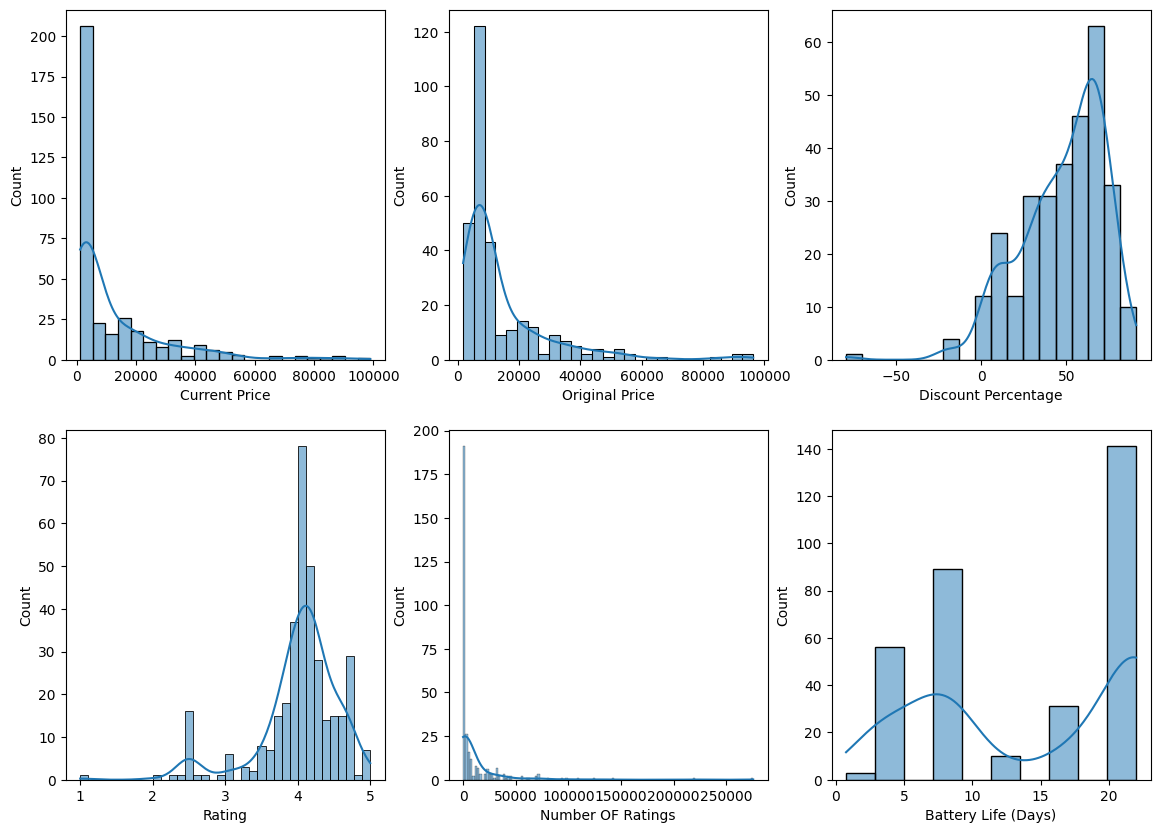

In [27]:
fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i , colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=train_df[colum], ax=ax, kde=True)

plt.show()

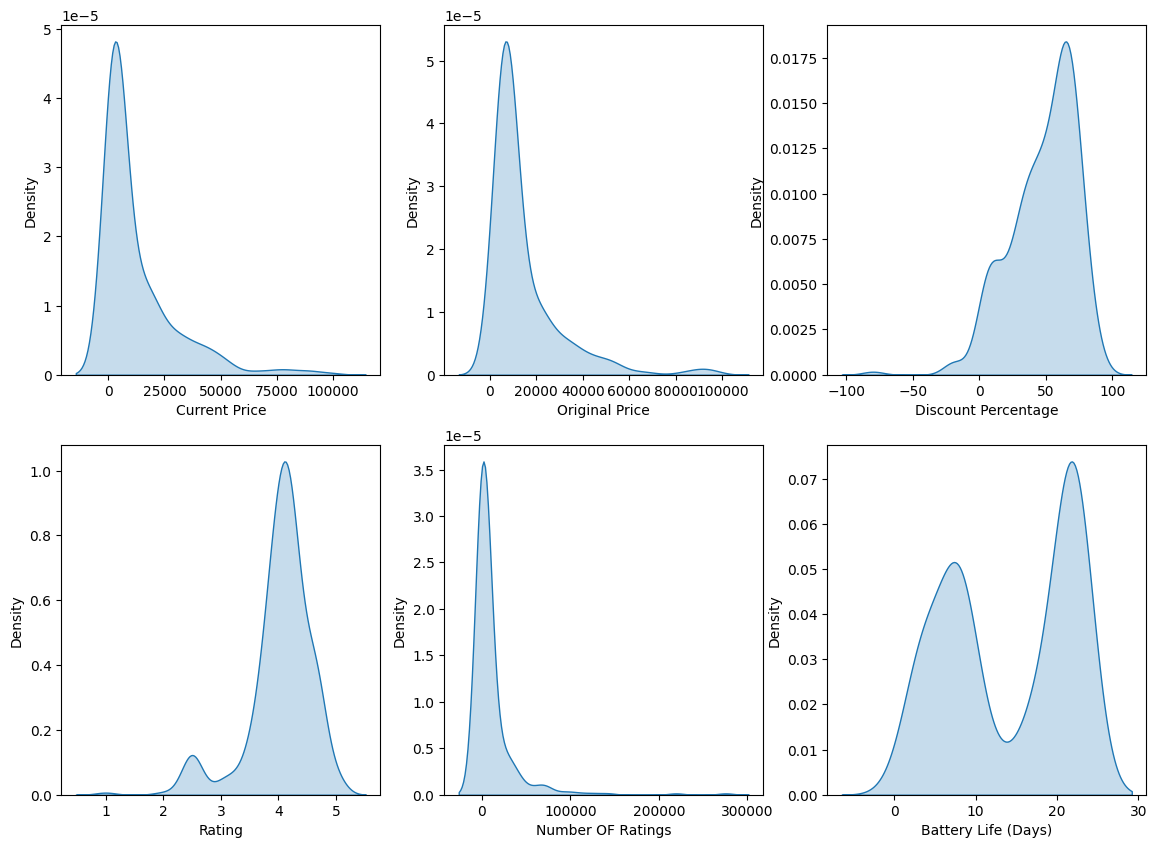

In [28]:
fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i , colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[colum], ax=ax, fill=True)

plt.show()

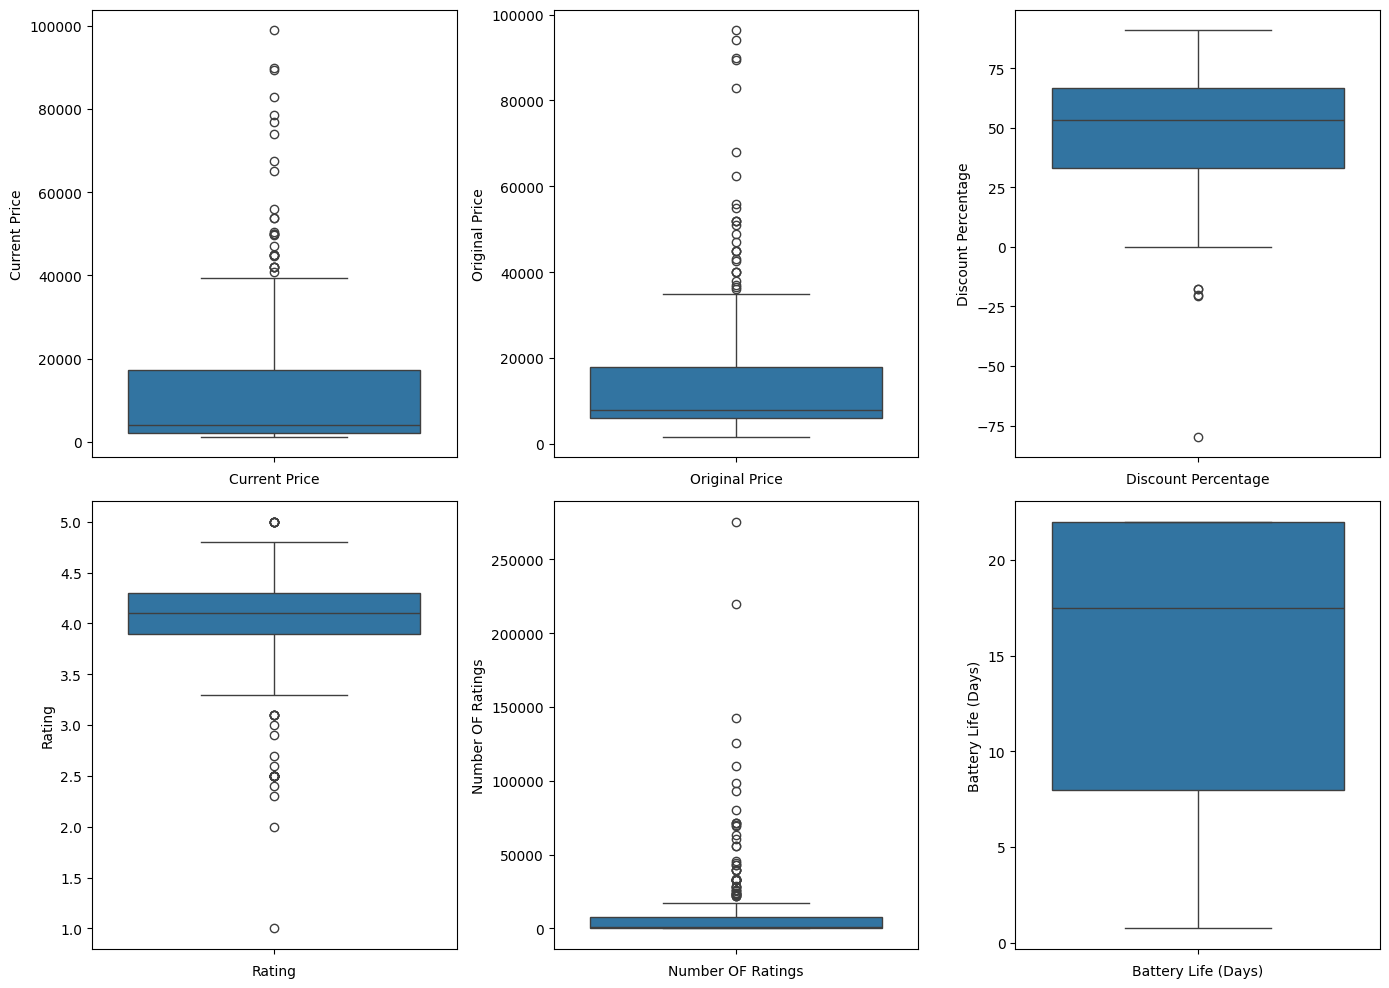

In [29]:
fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i , colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data=train_df[colum], ax=ax)
    ax.set_xlabel(colum)

fig.tight_layout()
plt.show()

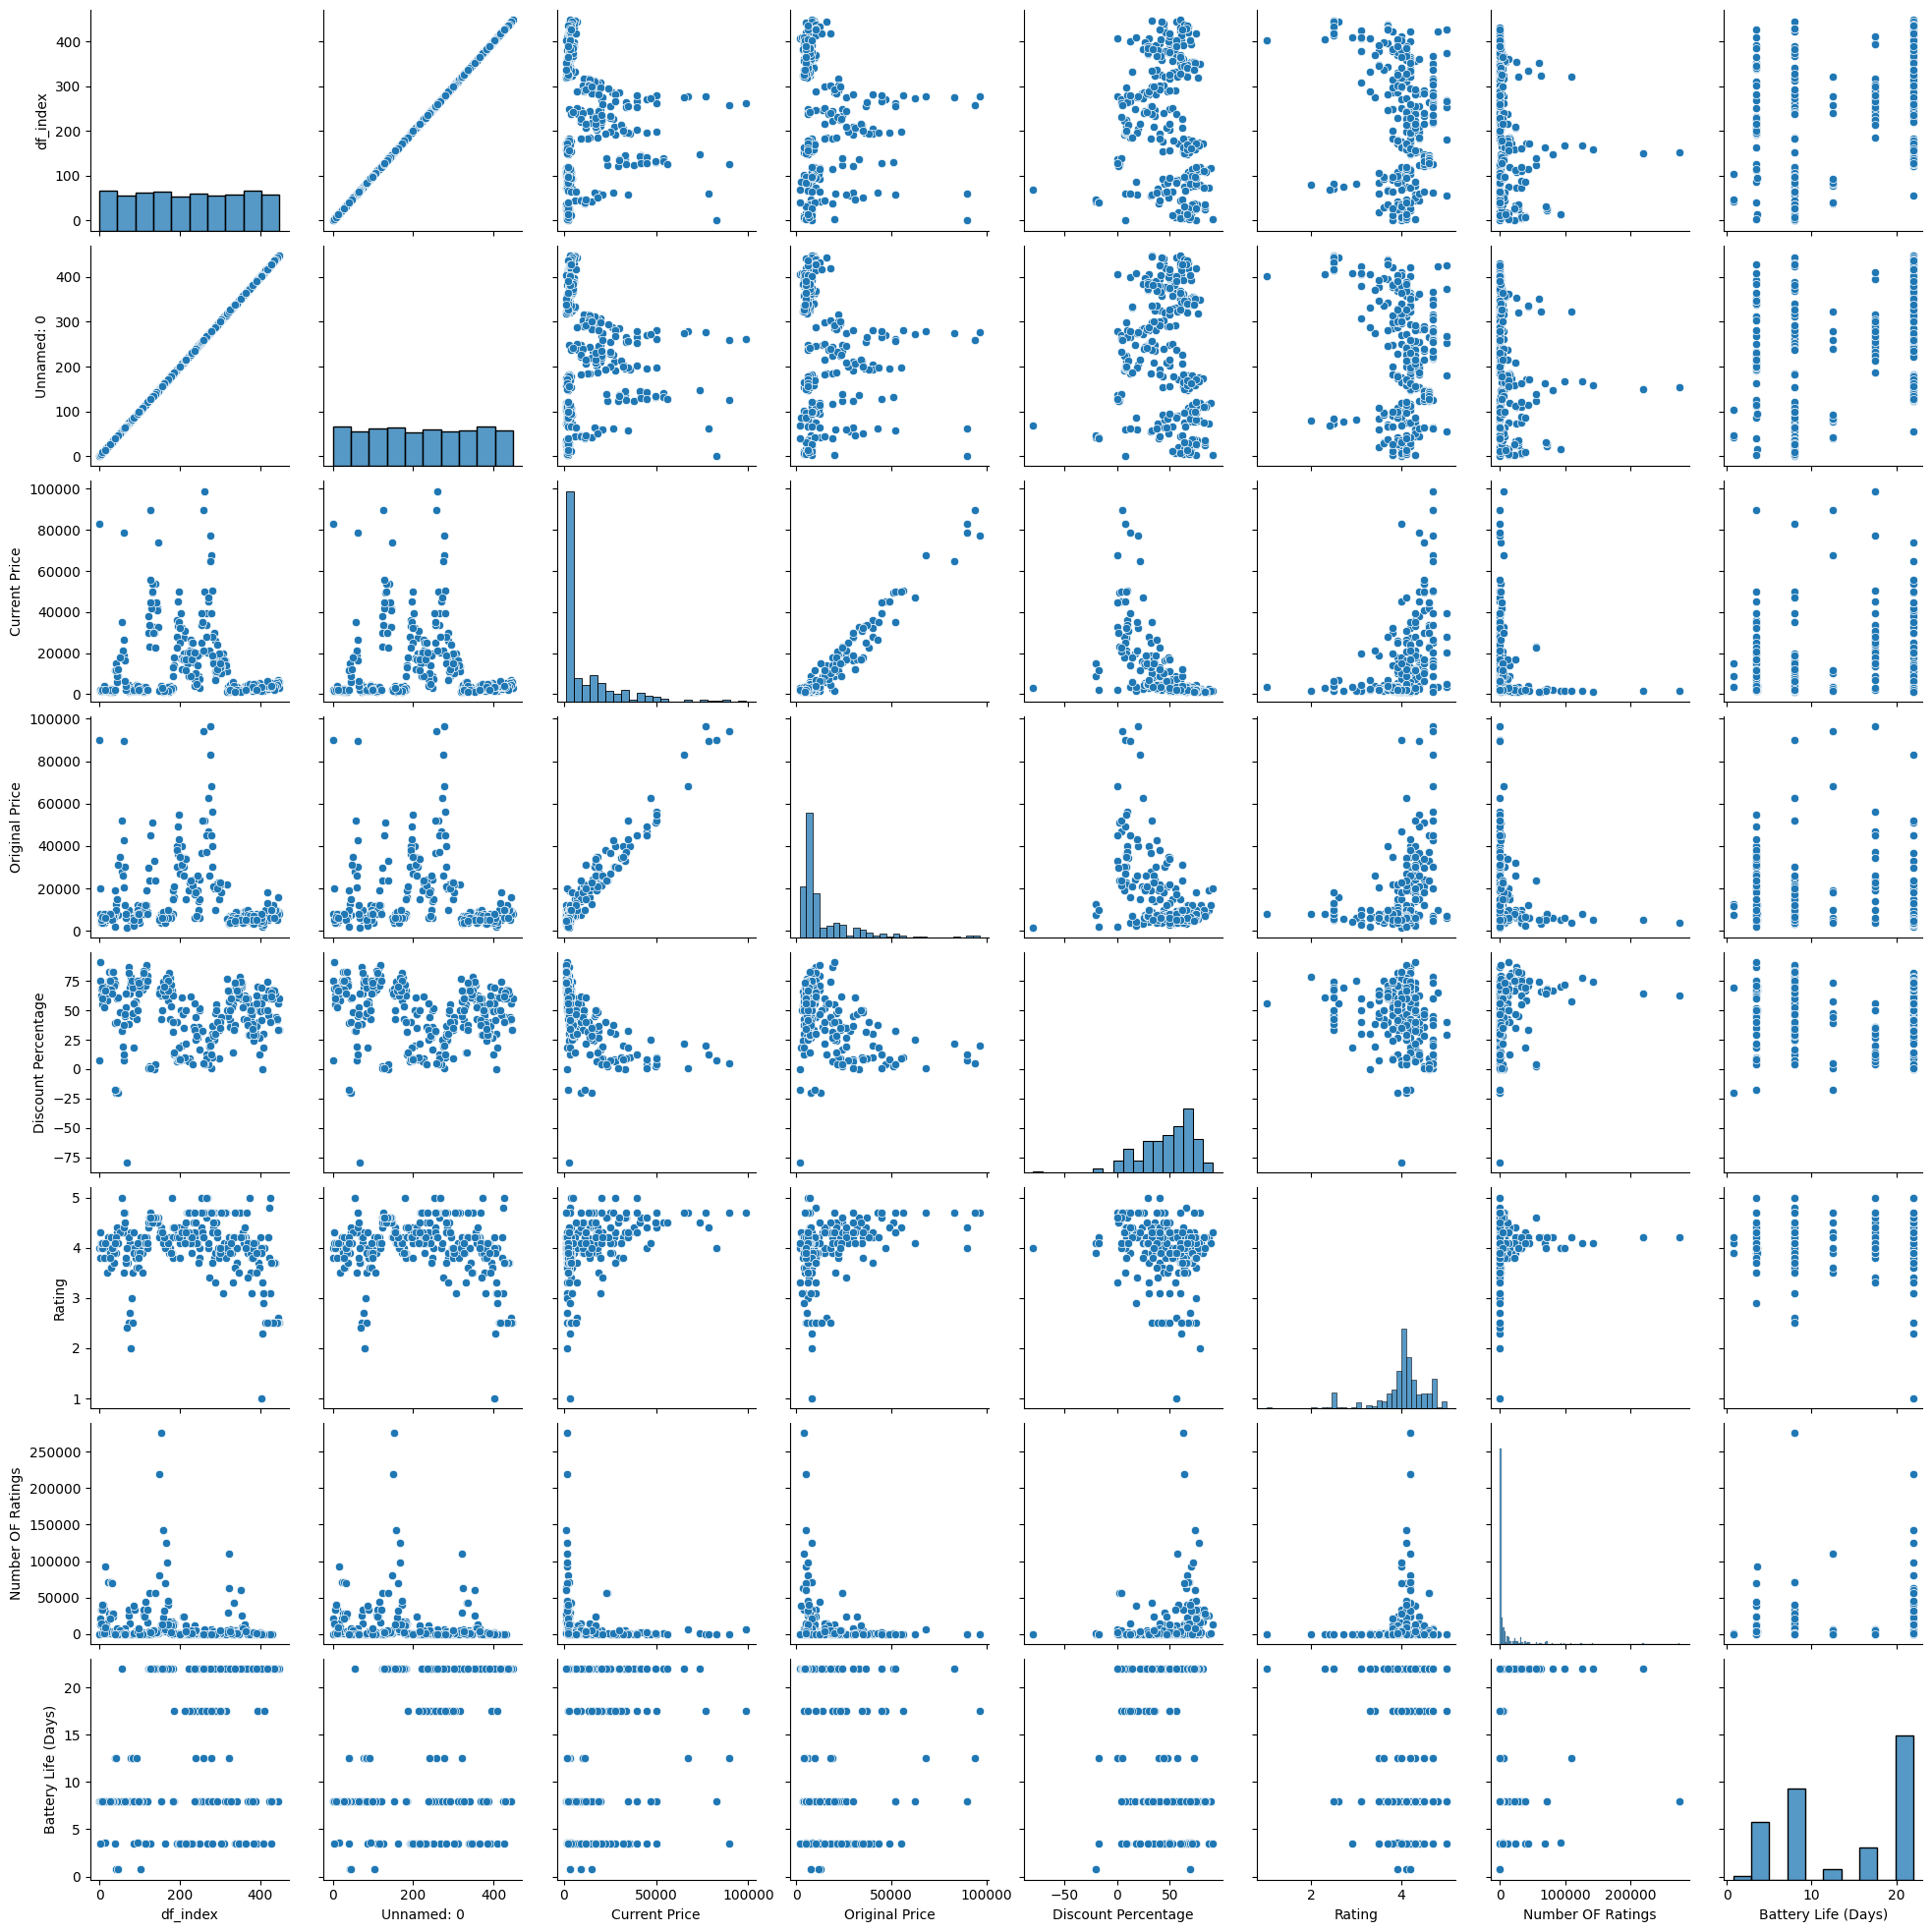

In [30]:
sns.pairplot(train_df)

In [31]:
sns.heatmap(train_df.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'zebronics'

In [32]:
train_df.head()

df_index  Unnamed: 0       Brand  Current Price  Original Price  \
0       407         407   zebronics         2949.0          4199.0   
1       444         444  fire-boltt         6999.0         15999.0   
2       117         117  fire-boltt         2499.0         11999.0   
3        30          30        boat         1999.0          7990.0   
4       415         415  fire-boltt         2299.0          5999.0   

   Discount Percentage  Rating  Number OF Ratings       Model Name Dial Shape  \
0            29.768993     3.1               10.0  LEATHER fit-650       Oval   
1            56.253516     2.6                NaN           bsw020     Circle   
2            79.173264     4.1             1990.0           BSW070        NaN   
3            74.981227     3.6              827.0              NaN        NaN   
4            61.676946     2.5               24.0    NINJA PRO MAX     Square   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0       Black        Leather         Yes                  NaN       Yes   
1       Brown        Silicon         Yes                  8.0       Yes   
2         NaN            NaN         Yes                  8.0       Yes   
3         NaN            NaN         NaN                  8.0       Yes   
4        Blue        Silicon         Yes                 22.0       Yes   

  Display Size Weight  
0   2.7 inches    NaN  
1   1.4 inches    NaN  
2   1.9 inches  75g +  
3          NaN  75g +  
4   1.6 inches    NaN

In [34]:
train_df.drop(['df_index', 'Unnamed: 0'], axis=1, inplace=True)

In [35]:
train_df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0   zebronics         2949.0          4199.0            29.768993     3.1   
1  fire-boltt         6999.0         15999.0            56.253516     2.6   
2  fire-boltt         2499.0         11999.0            79.173264     4.1   
3        boat         1999.0          7990.0            74.981227     3.6   
4  fire-boltt         2299.0          5999.0            61.676946     2.5   

   Number OF Ratings       Model Name Dial Shape Strap Color Strap Material  \
0               10.0  LEATHER fit-650       Oval       Black        Leather   
1                NaN           bsw020     Circle       Brown        Silicon   
2             1990.0           BSW070        NaN         NaN            NaN   
3              827.0              NaN        NaN         NaN            NaN   
4               24.0    NINJA PRO MAX     Square        Blue        Silicon   

  Touchscreen  Battery Life (Days) Bluetooth Display Size Weight  
0         Yes                  NaN       Yes   2.7 inches    NaN  
1         Yes                  8.0       Yes   1.4 inches    NaN  
2         Yes                  8.0       Yes   1.9 inches  75g +  
3         NaN                  8.0       Yes          NaN  75g +  
4         Yes                 22.0       Yes   1.6 inches    NaN